In [1]:
from fastai.vision import *
from fastai.widgets import *

In [2]:
# set path
path = Path('data')

In [3]:
# load data
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.1,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [4]:
data.classes

['contusion', 'not_contusion']

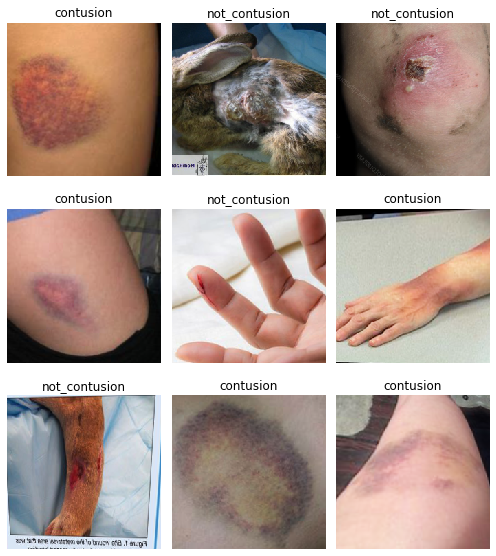

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [6]:
# init model
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [7]:
# train
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.791523,0.478912,0.260870,01:58
1,0.554508,0.251908,0.086957,01:19
2,0.411005,0.217271,0.086957,01:03
3,0.342080,0.193801,0.086957,01:03


In [8]:
learn.unfreeze()

In [9]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.134343,0.293155,0.086957,01:55
1,0.110137,0.154098,0.086957,01:47


In [10]:
learn.save('bruise_classifier')

In [63]:
# load in folder with duplicate data
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(size=224)
                   .databunch()
     ) 

In [64]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

In [65]:
learn_cln.load('bruise_classifier');

In [66]:
# get similar images by looking at activations
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [68]:
# interactive image cleaner widget
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [69]:
# read in csv
clean = pd.read_csv('data/cleaned.csv')

In [70]:
# look at number of files prior to cleaning
conts = [o.name for o in os.scandir(path/'contusion')]
len(conts)

1387

In [71]:
# show number of cleaned files
len(clean.loc[clean.label == 'contusion'])

1129

In [72]:
# gather cleaned files
cfs = clean.loc[clean.label == 'contusion'].name

In [73]:
# create directory for cleaned data
os.makedirs('cleaned',exist_ok=True)
dest = './cleaned/' # set destination directory

In [74]:
# move files to cleaned folder
for f in cfs:
    # shutil.copy(path/f, dest + f.split('/')[-1])
    shutil.move(path/f, dest + f.split('/')[-1])

In [76]:
# test if number of files moves was correct 
assert len(Path('cleaned').ls()) == len(clean.loc[clean.label == 'contusion'])